In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as stats
from sklearn import preprocessing
import math
from factor_analyzer import FactorAnalyzer, Rotator

In [4]:
df = "./df_for_fa.csv"
df = pd.read_csv(df,encoding = "cp932")
df

,Q3.1_1,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,...,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7
0,68.750000,5.083333,4.750000,4.750000,4.166667,4.083333,3.583333,4.416667,4.000000,4.166667,...,4.750000,4.250000,5.500000,5.000000,5.083333,5.500000,4.583333,4.083333,4.166667,5.500000
1,55.789474,4.263158,4.578947,4.105263,4.368421,4.789474,4.526316,4.315789,4.263158,4.631579,...,4.842105,4.000000,5.315789,4.736842,5.368421,4.263158,4.263158,4.315789,3.894737,4.947368
2,71.111111,5.000000,5.277778,5.000000,3.722222,3.777778,3.277778,4.333333,4.222222,4.000000,...,4.777778,4.055556,5.666667,5.388889,5.722222,5.500000,4.388889,4.277778,4.444444,5.111111
3,52.769231,3.692308,3.923077,3.692308,5.153846,5.384615,5.076923,4.769231,4.769231,4.461538,...,4.230769,3.769231,5.384615,4.615385,5.923077,4.000000,4.000000,4.923077,4.076923,5.307692
4,57.400000,3.200000,3.466667,3.266667,4.733333,4.800000,4.600000,4.200000,4.333333,4.266667,...,4.133333,3.666667,4.866667,4.666667,5.533333,3.933333,4.333333,5.000000,3.933333,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70.529412,4.941176,4.647059,4.588235,4.470588,4.647059,4.058824,4.705882,4.823529,4.941176,...,5.000000,3.823529,5.176471,5.000000,5.647059,5.352941,4.764706,4.882353,5.058824,5.176471
996,60.950000,5.100000,5.100000,5.300000,3.350000,3.650000,3.100000,3.750000,3.700000,3.450000,...,4.650000,3.900000,4.900000,5.100000,5.150000,5.100000,3.850000,3.750000,4.050000,4.550000
997,73.928571,5.642857,5.571429,5.500000,3.071429,3.000000,2.285714,3.642857,3.214286,3.642857,...,4.500000,3.785714,5.214286,4.785714,5.071429,5.642857,4.357143,3.571429,4.071429,4.857143
998,63.250000,4.500000,5.000000,4.333333,4.583333,5.166667,4.000000,4.416667,4.250000,4.333333,...,4.833333,4.166667,3.583333,5.083333,5.333333,5.000000,5.250000,4.500000,4.500000,4.750000


In [7]:
fa_df = df.drop('Q3.1_1', axis=1)
for i in range(3,8):
    fa_df = fa_df.drop("Q3.{}".format(i),axis=1)
fa_df

,Q3.2_1,Q3.2_2,Q3.2_3,Q3.2_4,Q3.2_5,Q3.2_6,Q3.2_7,Q3.2_8,Q3.2_9,Q3.2_10,...,Q3.2_23,Q3.2_24,Q3.2_25,Q3.2_26,Q3.2_27,Q3.2_28,Q3.2_29,Q3.2_30,Q3.2_31,Q3.2_32
0,5.083333,4.750000,4.750000,4.166667,4.083333,3.583333,4.416667,4.000000,4.166667,3.250000,...,4.250000,4.166667,4.583333,3.166667,4.000000,4.750000,4.250000,5.500000,5.000000,5.083333
1,4.263158,4.578947,4.105263,4.368421,4.789474,4.526316,4.315789,4.263158,4.631579,2.842105,...,4.631579,3.789474,3.947368,3.736842,5.000000,4.842105,4.000000,5.315789,4.736842,5.368421
2,5.000000,5.277778,5.000000,3.722222,3.777778,3.277778,4.333333,4.222222,4.000000,3.333333,...,4.500000,3.888889,4.000000,3.500000,4.555556,4.777778,4.055556,5.666667,5.388889,5.722222
3,3.692308,3.923077,3.692308,5.153846,5.384615,5.076923,4.769231,4.769231,4.461538,3.307692,...,4.076923,4.000000,3.846154,3.307692,4.846154,4.230769,3.769231,5.384615,4.615385,5.923077
4,3.200000,3.466667,3.266667,4.733333,4.800000,4.600000,4.200000,4.333333,4.266667,3.533333,...,4.333333,4.266667,3.933333,4.066667,4.733333,4.133333,3.666667,4.866667,4.666667,5.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.941176,4.647059,4.588235,4.470588,4.647059,4.058824,4.705882,4.823529,4.941176,3.882353,...,4.823529,3.823529,4.588235,3.411765,4.764706,5.000000,3.823529,5.176471,5.000000,5.647059
996,5.100000,5.100000,5.300000,3.350000,3.650000,3.100000,3.750000,3.700000,3.450000,3.400000,...,4.200000,3.850000,4.050000,3.400000,4.550000,4.650000,3.900000,4.900000,5.100000,5.150000
997,5.642857,5.571429,5.500000,3.071429,3.000000,2.285714,3.642857,3.214286,3.642857,3.214286,...,4.214286,3.928571,4.071429,2.857143,4.571429,4.500000,3.785714,5.214286,4.785714,5.071429
998,4.500000,5.000000,4.333333,4.583333,5.166667,4.000000,4.416667,4.250000,4.333333,4.333333,...,4.500000,4.833333,4.750000,3.583333,4.500000,4.833333,4.166667,3.583333,5.083333,5.333333


In [8]:
fa_df.to_csv("fa_df.csv")

In [9]:
word = "./word.csv"
word = pd.read_csv(word, header=None)
word

,0
0,がっつり食べれそう
1,お腹にたまる
2,ボリューム感がある
3,ヘルシー
4,胃もたれしない
5,あっさりしている
6,"体にいい, 体によさそう"
7,体を気遣っている
8,栄養バランスがいい
9,珍しい


In [15]:
col_dict = {}
for i in range(len(fa_df.columns)):
    col_dict[fa_df.columns[i]] = word[0][i]

col_dict

{'Q3.2_1': 'がっつり食べれそう',
 'Q3.2_2': 'お腹にたまる',
 'Q3.2_3': 'ボリューム感がある',
 'Q3.2_4': 'ヘルシー',
 'Q3.2_5': '胃もたれしない',
 'Q3.2_6': 'あっさりしている',
 'Q3.2_7': '体にいい, 体によさそう',
 'Q3.2_8': '体を気遣っている',
 'Q3.2_9': '栄養バランスがいい',
 'Q3.2_10': '珍しい',
 'Q3.2_11': '早く食べれる',
 'Q3.2_12': '色鮮やか',
 'Q3.2_13': '配色がきれい',
 'Q3.2_14': '彩がきれい',
 'Q3.2_15': '他と違う並べ方',
 'Q3.2_16': '普段食べない',
 'Q3.2_17': '凝っている',
 'Q3.2_18': '作れそう, 自分で作れる',
 'Q3.2_19': '食べやすい',
 'Q3.2_20': '似てる',
 'Q3.2_21': '一口サイズ',
 'Q3.2_22': 'きれいな器',
 'Q3.2_23': '場所が固まっている',
 'Q3.2_24': '新鮮',
 'Q3.2_25': 'つやがある',
 'Q3.2_26': 'ぱさってする',
 'Q3.2_27': 'もったいなくない',
 'Q3.2_28': 'くずれない',
 'Q3.2_29': '時間が増える',
 'Q3.2_30': '米がある安心感',
 'Q3.2_31': 'ぺちゃんこじゃない',
 'Q3.2_32': '食べきれる'}

## 扱うデータフレーム定義

In [20]:
fa_df = fa_df.rename(columns=col_dict)
fa_df

,がっつり食べれそう,お腹にたまる,ボリューム感がある,ヘルシー,胃もたれしない,あっさりしている,"体にいい, 体によさそう",体を気遣っている,栄養バランスがいい,珍しい,...,場所が固まっている,新鮮,つやがある,ぱさってする,もったいなくない,くずれない,時間が増える,米がある安心感,ぺちゃんこじゃない,食べきれる
0,5.083333,4.750000,4.750000,4.166667,4.083333,3.583333,4.416667,4.000000,4.166667,3.250000,...,4.250000,4.166667,4.583333,3.166667,4.000000,4.750000,4.250000,5.500000,5.000000,5.083333
1,4.263158,4.578947,4.105263,4.368421,4.789474,4.526316,4.315789,4.263158,4.631579,2.842105,...,4.631579,3.789474,3.947368,3.736842,5.000000,4.842105,4.000000,5.315789,4.736842,5.368421
2,5.000000,5.277778,5.000000,3.722222,3.777778,3.277778,4.333333,4.222222,4.000000,3.333333,...,4.500000,3.888889,4.000000,3.500000,4.555556,4.777778,4.055556,5.666667,5.388889,5.722222
3,3.692308,3.923077,3.692308,5.153846,5.384615,5.076923,4.769231,4.769231,4.461538,3.307692,...,4.076923,4.000000,3.846154,3.307692,4.846154,4.230769,3.769231,5.384615,4.615385,5.923077
4,3.200000,3.466667,3.266667,4.733333,4.800000,4.600000,4.200000,4.333333,4.266667,3.533333,...,4.333333,4.266667,3.933333,4.066667,4.733333,4.133333,3.666667,4.866667,4.666667,5.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.941176,4.647059,4.588235,4.470588,4.647059,4.058824,4.705882,4.823529,4.941176,3.882353,...,4.823529,3.823529,4.588235,3.411765,4.764706,5.000000,3.823529,5.176471,5.000000,5.647059
996,5.100000,5.100000,5.300000,3.350000,3.650000,3.100000,3.750000,3.700000,3.450000,3.400000,...,4.200000,3.850000,4.050000,3.400000,4.550000,4.650000,3.900000,4.900000,5.100000,5.150000
997,5.642857,5.571429,5.500000,3.071429,3.000000,2.285714,3.642857,3.214286,3.642857,3.214286,...,4.214286,3.928571,4.071429,2.857143,4.571429,4.500000,3.785714,5.214286,4.785714,5.071429
998,4.500000,5.000000,4.333333,4.583333,5.166667,4.000000,4.416667,4.250000,4.333333,4.333333,...,4.500000,4.833333,4.750000,3.583333,4.500000,4.833333,4.166667,3.583333,5.083333,5.333333


In [88]:
fa_df.to_csv("df.csv",encoding='utf_8_sig')

In [26]:
fa = FactorAnalyzer(n_factors=5, method="ml")#,rotation="promax")
fa.fit(fa_df)

FactorAnalyzer(method='ml', n_factors=5, rotation_kwargs={})

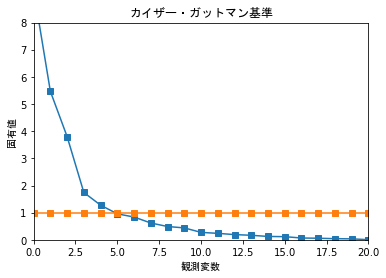

In [25]:
e_one = np.ones(146)
rand_df = pd.DataFrame(np.random.rand(30,146))
rand_corr = np.linalg.eig(rand_df.corr())[0]

plt.plot(fa.get_eigenvalues()[1], "s-")
plt.plot(e_one, "s-")
plt.ylim(0,8)
plt.xlim(0,20)
plt.title("カイザー・ガットマン基準", fontname="MS Gothic")
plt.ylabel("固有値", fontname="MS Gothic")
plt.xlabel("観測変数", fontname="MS Gothic")
plt.show()

In [28]:
col = []
a = "factor"
for i in range(1,6):
    col.append("factor{}".format(i))
    
loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

loadings_df

,factor1,factor2,factor3,factor4,factor5
0,,,,,
がっつり食べれそう,-0.189679,-0.049761,0.948830,-0.022014,-0.006260
お腹にたまる,-0.152492,-0.137813,0.957887,-0.007905,0.041191
ボリューム感がある,-0.091581,-0.036884,0.964676,0.044180,-0.077776
ヘルシー,0.899094,-0.022033,-0.327331,0.141492,-0.013588
胃もたれしない,0.664499,-0.002781,-0.474721,0.083879,0.208903
あっさりしている,0.584477,-0.034359,-0.618232,0.108648,0.193947
"体にいい, 体によさそう",1.002755,-0.030040,-0.097163,0.062222,-0.051943
体を気遣っている,0.997733,0.001051,-0.069182,0.040483,-0.084780
栄養バランスがいい,0.916809,0.152278,0.065650,-0.092690,-0.167761


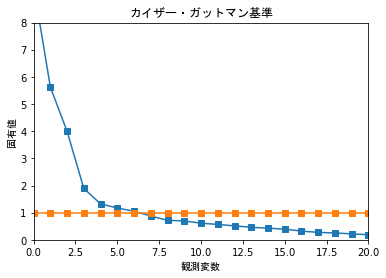

In [74]:
e_one = np.ones(32)
rand_df = pd.DataFrame(np.random.rand(1000,32))
rand_eig = np.linalg.eig(rand_df.corr())[0]

plt.plot(np.linalg.eig(fa_df.corr())[0], "s-")
#plt.plot(rand_eig, "s-")
plt.plot(e_one, "s-")
plt.ylim(0,8)
plt.xlim(0,20)
plt.title("カイザー・ガットマン基準", fontname="MS Gothic")
plt.ylabel("固有値", fontname="MS Gothic")
plt.xlabel("観測変数", fontname="MS Gothic")
plt.show()

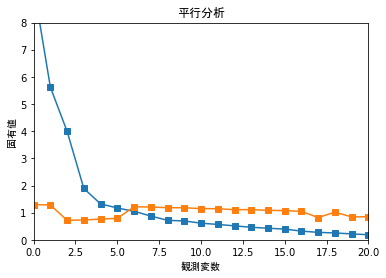

In [85]:
e_one = np.ones(32)
rand_df = pd.DataFrame(np.random.rand(1000,32))
rand_eig = np.linalg.eig(rand_df.corr())[0]

plt.plot(np.linalg.eig(fa_df.corr())[0], "s-")
plt.plot(rand_eig, "s-")
#plt.plot(e_one, "s-")
plt.ylim(0,8)
plt.xlim(0,20)
plt.title("平行分析", fontname="MS Gothic")
plt.ylabel("固有値", fontname="MS Gothic")
plt.xlabel("観測変数", fontname="MS Gothic")
plt.show()

In [86]:
eig_df = pd.DataFrame({"rand_eig":rand_eig,"data_eig":np.linalg.eig(fa_df.corr())[0]})
eig_df

,rand_eig,data_eig
0,1.300777,9.346431
1,1.289632,5.622854
2,0.725166,3.998496
3,0.736385,1.896479
4,0.771022,1.328637
5,0.797342,1.179637
6,1.223517,1.055719
7,1.212405,0.883490
8,1.190141,0.724529
9,1.185682,0.701473


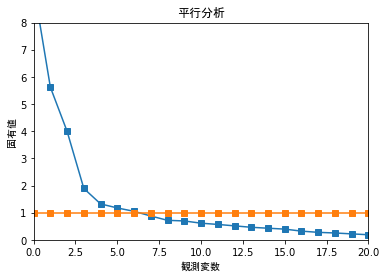

In [94]:
e_one = np.ones(32)
rand_df = pd.DataFrame(np.random.rand(1000,32))
rand_eig = np.linalg.eig(rand_df.corr())[0]

plt.plot(np.linalg.eig(minmax_df.corr())[0], "s-")
#plt.plot(rand_eig, "s-")
plt.plot(e_one, "s-")
plt.ylim(0,8)
plt.xlim(0,20)
plt.title("平行分析", fontname="MS Gothic")
plt.ylabel("固有値", fontname="MS Gothic")
plt.xlabel("観測変数", fontname="MS Gothic")
plt.show()

In [95]:
np.linalg.eig(minmax_df.corr())[0]

array([9.346431  , 5.62285373, 3.99849647, 1.89647921, 1.3286367 ,
       1.17963692, 1.05571851, 0.88348971, 0.72452886, 0.70147295,
       0.61927243, 0.5734339 , 0.52121206, 0.46849464, 0.43418678,
       0.40117974, 0.32713955, 0.28233989, 0.25881506, 0.22600303,
       0.1942901 , 0.17867091, 0.15261469, 0.13863415, 0.09866683,
       0.08309136, 0.07123851, 0.03278408, 0.04148364, 0.04749103,
       0.05778099, 0.05343258])

In [96]:
eig_df = pd.DataFrame({"rand_eig":rand_eig,"data_eig":np.linalg.eig(fa_df.corr())[0],"minmax_eig":np.linalg.eig(minmax_df.corr())[0]})
eig_df

,rand_eig,data_eig,minmax_eig
0,1.328322,9.346431,9.346431
1,1.319702,5.622854,5.622854
2,0.690573,3.998496,3.998496
3,0.697868,1.896479,1.896479
4,1.264887,1.328637,1.328637
5,1.222723,1.179637,1.179637
6,1.212278,1.055719,1.055719
7,0.757352,0.883490,0.883490
8,0.777729,0.724529,0.724529
9,0.782670,0.701473,0.701473


## 因子分析の実行

### 因子数７、最尤法、promax

In [209]:
fa = FactorAnalyzer(n_factors=7, method="ml",rotation="promax")
fa.fit(fa_df)
col = []
a = "factor"
for i in range(1,8):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,,,,,,,
色鮮やか,1.136284,-0.027237,-0.120923,-0.108683,-0.128769,-0.064843,-0.017270
配色がきれい,1.125757,-0.040184,-0.120581,-0.158658,-0.052428,-0.063776,0.026192
彩がきれい,1.091679,-0.012984,-0.108222,-0.122359,-0.043260,-0.054140,0.007352
つやがある,0.637697,0.073888,0.151830,0.076269,-0.002840,0.078696,-0.027666
新鮮,0.512430,0.309143,0.043217,0.162863,0.029602,0.064909,0.073773
"体にいい, 体によさそう",-0.005080,0.948500,-0.030926,0.032078,0.013705,0.033774,-0.104308
体を気遣っている,0.019910,0.934797,-0.010299,0.015876,0.019341,0.009419,-0.126927
ヘルシー,0.022037,0.895957,-0.249747,0.062995,-0.048835,0.024918,-0.003508
栄養バランスがいい,0.148728,0.844496,0.120856,-0.070424,0.004802,0.002560,-0.224804


In [210]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
factor1,1.000000,0.301760,-0.012818,0.377277,0.094169,0.599033,0.588525
factor2,0.301760,1.000000,-0.068814,0.117650,-0.204189,0.249794,-0.129304
factor3,-0.012818,-0.068814,1.000000,0.068093,0.275075,0.037614,-0.012655
factor4,0.377277,0.117650,0.068093,1.000000,-0.411985,0.040471,0.218434
factor5,0.094169,-0.204189,0.275075,-0.411985,1.000000,0.295449,0.183162
factor6,0.599033,0.249794,0.037614,0.040471,0.295449,1.000000,0.551669
factor7,0.588525,-0.129304,-0.012655,0.218434,0.183162,0.551669,1.000000


In [211]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,0.626011,0.667755,0.385463,0.278341,0.644539,0.679015,0.512187
1,0.418966,0.472592,0.461810,0.154525,0.653625,0.519461,0.577724
2,0.544229,0.734635,0.367991,0.268911,0.755685,0.674837,0.482227
3,0.434132,0.324189,0.470190,0.268569,0.839505,0.467310,0.684329
4,0.478149,0.227568,0.355663,0.338071,0.667761,0.437759,0.539189
...,...,...,...,...,...,...,...
995,0.649259,0.638137,0.363448,0.379576,0.731640,0.643529,0.649115
996,0.405739,0.716501,0.407673,0.342740,0.523176,0.554484,0.364467
997,0.453466,0.835847,0.253782,0.285849,0.458062,0.391415,0.285186
998,0.717414,0.548349,0.589064,0.454047,0.778870,0.435612,0.582687


In [212]:
img_path = "./bentodataset1000.csv"
img_path = pd.read_csv(img_path, header=None)
img_path

,0,1
0,11n24y (10).jpg,IM_6zIPXwjhhxmikqa
1,11n24y (15).jpg,IM_09Dutjwc6TWaDau
2,11n24y (20).jpg,IM_8vJ8hpauQtyXaGq
3,11n24y (22).jpg,IM_0kSfSTGnLaQEkbs
4,11n24y (24).jpg,IM_bC6ySDHZzAa3r9Q
...,...,...
995,yumben (57).jpg,IM_3EFU6Q2mOm4f2zc
996,yumben (58).jpg,IM_7TLyjwz157zwhAa
997,yumben (59).jpg,IM_dbPahhYpdqanZEa
998,yumben (60).jpg,IM_2f6Llr6tF2NuAN8


In [213]:
img_path[0][0]

'11n24y (10).jpg'

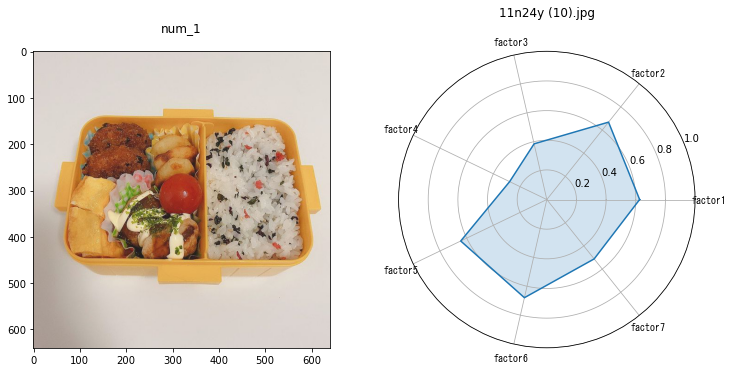

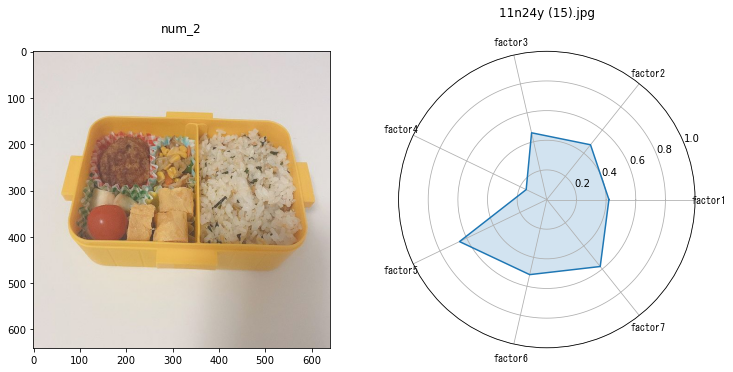

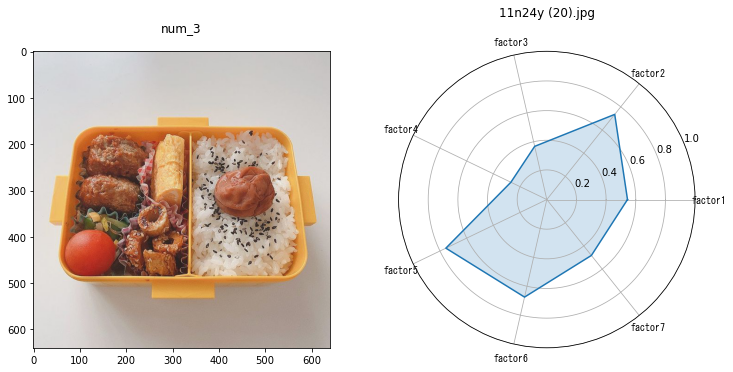

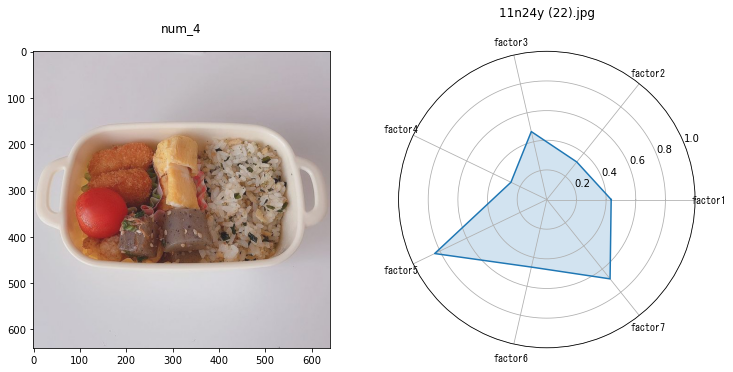

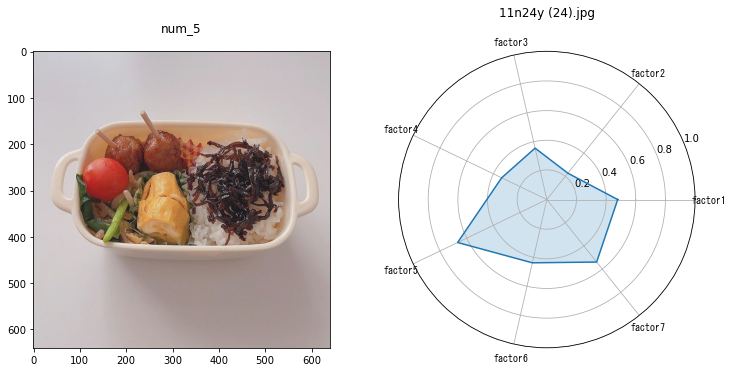

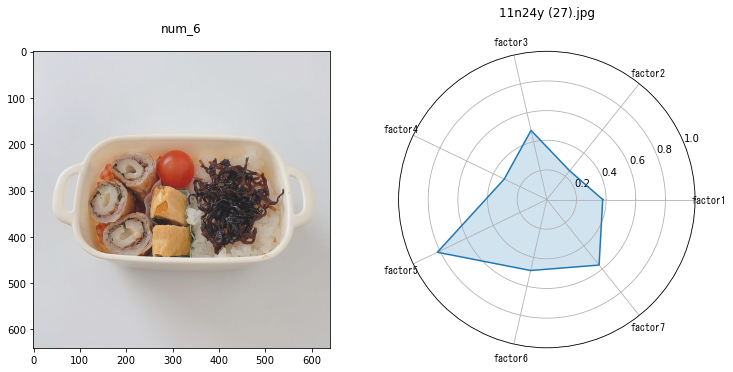

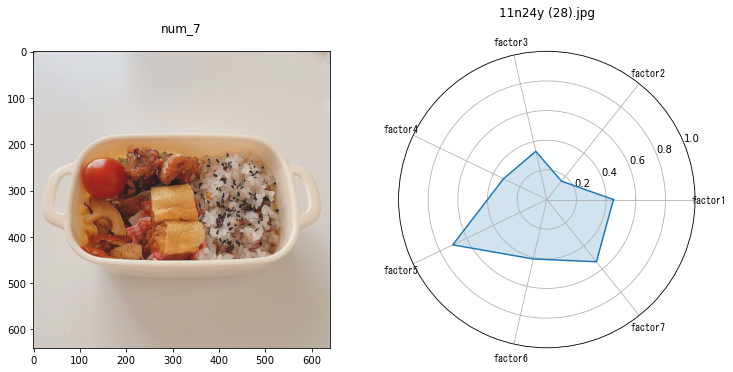

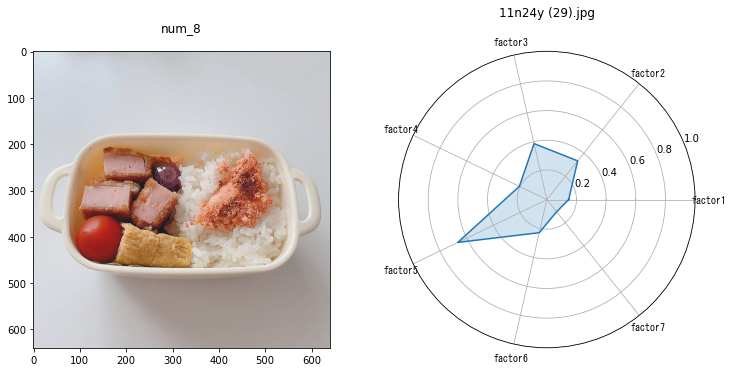

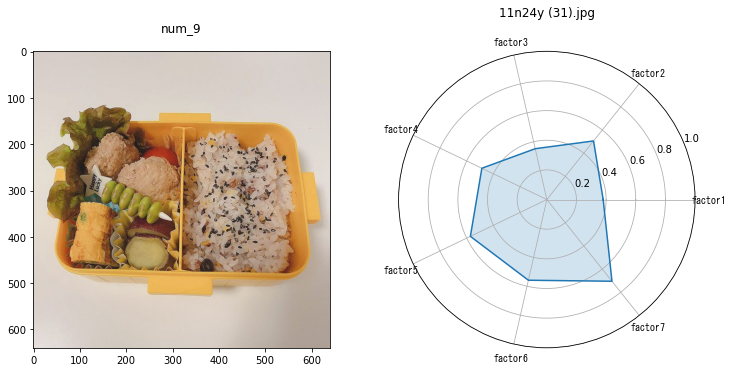

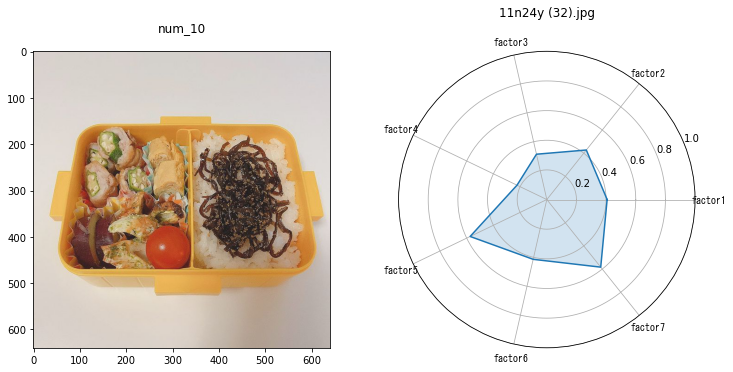

In [214]:
for i in range(10):#len(norm_score_df)):
    # 多角形を閉じるためにデータの最後に最初の値を追加する。
    radar_values = np.concatenate([norm_score_df.loc[i], [norm_score_df.loc[i][0]]])

    # プロットする角度を生成する。
    angles = np.linspace(0, 2 * np.pi, len(col) + 1 , endpoint=True)


    fig = plt.figure(figsize=(12, 12))
    ax0 = fig.add_subplot(2, 2, 1)
    ax1 = fig.add_subplot(2, 2, 2, polar=True)
    ax0.imshow(mpimg.imread("./bento_dataset1000/{}".format(img_path[0][i])))
    ax0.set_title("num_{}".format(i+1), pad=20)


    # 極座標でaxを作成。
    # レーダーチャートの線を引く
    ax1.plot(angles, radar_values)
    #　レーダーチャートの内側を塗りつぶす
    ax1.fill(angles, radar_values, alpha=0.2)
    # 項目ラベルの表示
    ax1.set_thetagrids(angles[:-1] * 180 / np.pi, col,fontname="MS Gothic")
    ax1.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0]) # メモリ戦

    ax1.set_title("{}".format(img_path[0][i]), pad=20)
    plt.show()
    #fig.savefig(f"promax_to15/img{i+1}.png")

In [198]:
len(angles)

33

In [201]:
angles

array([0.        , 0.19634954, 0.39269908, 0.58904862, 0.78539816,
       0.9817477 , 1.17809725, 1.37444679, 1.57079633, 1.76714587,
       1.96349541, 2.15984495, 2.35619449, 2.55254403, 2.74889357,
       2.94524311, 3.14159265, 3.33794219, 3.53429174, 3.73064128,
       3.92699082, 4.12334036, 4.3196899 , 4.51603944, 4.71238898,
       4.90873852, 5.10508806, 5.3014376 , 5.49778714, 5.69413668,
       5.89048623, 6.08683577, 6.28318531])

In [202]:
len(word[0])

32

In [200]:
len(radar_values)

7

In [192]:
norm_score_df.loc[5][0]

0.5951109201887202

### 因子数７、最尤法、oblimin

In [167]:
fa = FactorAnalyzer(n_factors=7, method="ml",rotation="oblimin")
fa.fit(fa_df)

col = []
a = "factor"
for i in range(1,8):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,,,,,,,
"体にいい, 体によさそう",0.955091,0.001193,-0.006112,0.023512,0.008134,0.024906,0.018933
体を気遣っている,0.948602,0.024428,0.004088,0.004059,-0.007371,0.046097,-0.007572
栄養バランスがいい,0.910609,0.131017,0.095348,-0.087678,-0.000196,0.068619,-0.139867
ヘルシー,0.837187,0.018144,-0.185602,0.081962,-0.035420,-0.049080,0.141723
胃もたれしない,0.599181,0.044048,-0.285846,0.034173,0.106347,-0.067007,0.274052
あっさりしている,0.475995,0.032666,-0.410902,0.023731,0.010232,-0.102470,0.410276
配色がきれい,-0.032073,1.012749,-0.028881,-0.043970,-0.002927,-0.005987,0.025128
色鮮やか,-0.014210,1.010460,-0.054991,-0.000591,-0.044380,-0.031923,-0.029725
彩がきれい,0.004701,0.984071,-0.023628,-0.017535,0.005583,0.006151,0.006579


In [168]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
factor1,1.000000,0.150917,0.568595,0.231751,0.184892,0.327364,0.100339
factor2,0.150917,1.000000,-0.253386,0.035742,-0.131156,0.263845,-0.297335
factor3,0.568595,-0.253386,1.000000,0.126014,0.209663,0.301181,0.341790
factor4,0.231751,0.035742,0.126014,1.000000,-0.310020,0.162858,0.029971
factor5,0.184892,-0.131156,0.209663,-0.310020,1.000000,-0.005874,0.399371
factor6,0.327364,0.263845,0.301181,0.162858,-0.005874,1.000000,0.011617
factor7,0.100339,-0.297335,0.341790,0.029971,0.399371,0.011617,1.000000


In [169]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,0.648574,0.624273,0.524176,0.235701,0.690951,0.660309,0.422367
1,0.453200,0.447751,0.587175,0.136872,0.617321,0.481487,0.568519
2,0.543800,0.697472,0.500108,0.245056,0.781264,0.606192,0.362504
3,0.458884,0.287672,0.710551,0.294544,0.739772,0.311478,0.590506
4,0.523425,0.163953,0.571852,0.336655,0.634725,0.417588,0.473851
...,...,...,...,...,...,...,...
995,0.658921,0.581677,0.675699,0.359102,0.716414,0.569889,0.408874
996,0.402418,0.697221,0.364077,0.312686,0.553871,0.666020,0.367583
997,0.468959,0.802222,0.303420,0.246685,0.406991,0.530268,0.114130
998,0.750331,0.538481,0.583611,0.487859,0.653605,0.276997,0.524301


### 因子数７、minres、promax

In [170]:
fa = FactorAnalyzer(n_factors=7, method="minres",rotation="promax")
fa.fit(fa_df)

col = []
a = "factor"
for i in range(1,8):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,,,,,,,
"体にいい, 体によさそう",0.980304,0.003124,-0.046861,-0.002782,-0.042123,0.109043,-0.027111
体を気遣っている,0.967310,0.026991,-0.024405,-0.021761,-0.037972,0.082996,-0.041421
ヘルシー,0.910604,0.005599,-0.262405,0.089013,-0.091424,0.122078,0.028085
栄養バランスがいい,0.879224,0.186348,0.098517,-0.160139,-0.059133,0.032845,-0.071333
胃もたれしない,0.675502,-0.003942,-0.417231,0.079394,0.066741,0.212840,0.060787
あっさりしている,0.610558,-0.027434,-0.569191,0.075870,0.044518,0.107446,0.160975
色鮮やか,-0.022891,1.121410,-0.104377,-0.083483,-0.127750,-0.093503,0.058148
配色がきれい,-0.035603,1.084782,-0.097609,-0.110536,-0.031711,-0.086377,0.069337
彩がきれい,-0.006520,1.062954,-0.086843,-0.085872,-0.032812,-0.074926,0.051654


In [171]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
factor1,1.000000,-0.096709,0.279708,-0.087519,0.603989,0.531195,0.015155
factor2,-0.096709,1.000000,0.209031,-0.143666,0.278083,0.171707,-0.183724
factor3,0.279708,0.209031,1.000000,-0.132915,0.392728,0.064270,-0.280190
factor4,-0.087519,-0.143666,-0.132915,1.000000,-0.121941,0.125262,0.233107
factor5,0.603989,0.278083,0.392728,-0.121941,1.000000,0.562646,0.089422
factor6,0.531195,0.171707,0.064270,0.125262,0.562646,1.000000,0.347436
factor7,0.015155,-0.183724,-0.280190,0.233107,0.089422,0.347436,1.000000


In [172]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,0.520833,0.594175,0.230537,0.513755,0.630604,0.666683,0.506181
1,0.550998,0.416366,0.111314,0.594374,0.418240,0.537102,0.566267
2,0.485465,0.664108,0.228518,0.591495,0.541317,0.676129,0.645432
3,0.635458,0.250584,0.267488,0.445665,0.458218,0.510890,0.818147
4,0.524198,0.152114,0.297403,0.466803,0.485719,0.470180,0.579033
...,...,...,...,...,...,...,...
995,0.624455,0.568629,0.363804,0.461657,0.641532,0.647162,0.658352
996,0.385230,0.685296,0.296042,0.489856,0.414805,0.542009,0.425526
997,0.302489,0.789305,0.237186,0.319264,0.474221,0.397089,0.427595
998,0.549375,0.522470,0.442323,0.666240,0.728574,0.500277,0.771412


### 因子数７、minres、oblimin

In [173]:
fa = FactorAnalyzer(n_factors=7, method="minres",rotation="oblimin")
fa.fit(fa_df)

col = []
a = "factor"
for i in range(1,8):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,,,,,,,
"体にいい, 体によさそう",0.962039,0.018919,0.012019,0.002866,0.003209,-0.021105,-0.024124
体を気遣っている,0.945390,0.042686,0.026435,-0.014073,-0.003544,-0.043948,-0.037897
ヘルシー,0.890352,0.011146,-0.185024,0.087086,-0.032760,0.024786,0.038322
栄養バランスがいい,0.850284,0.184591,0.123358,-0.135576,-0.036426,-0.071943,-0.069619
胃もたれしない,0.703253,-0.001025,-0.300745,0.073377,0.144710,0.112000,0.078206
あっさりしている,0.608254,-0.024431,-0.451929,0.078775,0.075171,0.049236,0.204318
色鮮やか,-0.018711,1.015609,-0.059809,-0.006930,-0.067400,0.005561,0.003892
配色がきれい,-0.018538,0.989404,-0.040816,-0.031096,0.016755,-0.007368,0.019779
彩がきれい,0.012541,0.971081,-0.030673,-0.011006,0.020103,-0.004282,-0.001472


In [174]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
factor1,1.000000,-0.266417,0.150850,0.351294,0.547424,0.014625,-0.163001
factor2,-0.266417,1.000000,0.041439,-0.044763,0.167754,-0.223520,-0.254967
factor3,0.150850,0.041439,1.000000,-0.180767,0.238120,-0.117042,-0.227923
factor4,0.351294,-0.044763,-0.180767,1.000000,0.299526,0.243455,0.136661
factor5,0.547424,0.167754,0.238120,0.299526,1.000000,-0.108724,-0.185642
factor6,0.014625,-0.223520,-0.117042,0.243455,-0.108724,1.000000,0.253560
factor7,-0.163001,-0.254967,-0.227923,0.136661,-0.185642,0.253560,1.000000


In [175]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,0.527456,0.593748,0.220772,0.686915,0.666964,0.586392,0.390432
1,0.590642,0.441588,0.135316,0.596620,0.452562,0.696871,0.503086
2,0.506076,0.682797,0.227159,0.728737,0.554243,0.634336,0.506467
3,0.725547,0.261053,0.285520,0.626599,0.462379,0.546648,0.755244
4,0.584397,0.150353,0.329874,0.565932,0.523022,0.590137,0.586901
...,...,...,...,...,...,...,...
995,0.658738,0.562970,0.351176,0.680565,0.651999,0.515950,0.532110
996,0.380009,0.689676,0.300486,0.560941,0.425159,0.533617,0.362077
997,0.297476,0.791089,0.221381,0.397252,0.493416,0.359079,0.433223
998,0.606192,0.547176,0.466174,0.556916,0.762723,0.687378,0.760129


### 因子数6、ml、promax

In [176]:
fac_num = 6
fa = FactorAnalyzer(n_factors=fac_num, method="ml",rotation="promax")
fa.fit(fa_df)

col = []
a = "factor"
for i in range(1,fac_num+1):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6
0,,,,,,
色鮮やか,1.134446,-0.030417,-0.114917,-0.099938,-0.134703,-0.049768
配色がきれい,1.119401,-0.044553,-0.106289,-0.132217,-0.073756,-0.009572
彩がきれい,1.088656,-0.016789,-0.098513,-0.103870,-0.058432,-0.016865
つやがある,0.649726,0.080540,0.139500,0.036993,-0.001662,0.060212
新鮮,0.511622,0.312198,0.046045,0.182516,-0.004076,0.150105
"体にいい, 体によさそう",-0.000522,0.959001,-0.040891,0.029194,0.021684,-0.032047
体を気遣っている,0.026131,0.944266,-0.020330,0.009942,0.032440,-0.071133
ヘルシー,0.014150,0.901294,-0.248275,0.106811,-0.067488,0.047343
栄養バランスがいい,0.167040,0.853332,0.098759,-0.120033,0.046252,-0.164166


In [177]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6
factor1,1.000000,0.309941,0.586806,0.363505,0.119679,0.587237
factor2,0.309941,1.000000,-0.127828,0.199799,-0.147972,0.234997
factor3,0.586806,-0.127828,1.000000,0.162732,0.167430,0.558590
factor4,0.363505,0.199799,0.162732,1.000000,-0.274986,-0.019716
factor5,0.119679,-0.147972,0.167430,-0.274986,1.000000,0.311537
factor6,0.587237,0.234997,0.558590,-0.019716,0.311537,1.000000


In [178]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6
0,0.622829,0.641265,0.527507,0.276691,0.475891,0.684703
1,0.418434,0.449580,0.582215,0.166506,0.488123,0.523192
2,0.534711,0.694016,0.503072,0.256293,0.562814,0.693089
3,0.423914,0.290424,0.698662,0.253100,0.649571,0.491818
4,0.472338,0.198965,0.552124,0.325578,0.456850,0.456782
...,...,...,...,...,...,...
995,0.638498,0.604773,0.666942,0.356020,0.532289,0.661104
996,0.406963,0.702136,0.367419,0.351609,0.373000,0.557499
997,0.451427,0.802687,0.296735,0.294314,0.236795,0.409843
998,0.701847,0.518565,0.585624,0.424274,0.699858,0.432152


### 因子数6、ml、oblimn

In [179]:
fac_num = 6
fa = FactorAnalyzer(n_factors=fac_num, method="ml",rotation="oblimin")
fa.fit(fa_df)

col = []
a = "factor"
for i in range(1,fac_num+1):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6
0,,,,,,
"体にいい, 体によさそう",0.964184,0.015199,0.018302,0.003670,0.001146,-0.040273
体を気遣っている,0.947377,0.042502,0.029381,-0.018581,-0.012752,-0.073579
ヘルシー,0.899882,0.007632,-0.168036,0.090347,-0.026727,0.070781
栄養バランスがいい,0.854824,0.174099,0.122721,-0.139018,-0.041406,-0.143087
胃もたれしない,0.700369,0.008310,-0.286555,0.077490,0.159590,0.167135
あっさりしている,0.628006,-0.031587,-0.424700,0.100907,0.116661,0.214435
もったいなくない,0.286442,-0.085578,0.193112,-0.064595,0.187264,0.257592
色鮮やか,-0.017714,1.012736,-0.057634,-0.008389,-0.061431,0.011099
配色がきれい,-0.018072,1.003108,-0.034661,-0.033173,0.016829,0.017784


In [180]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6
factor1,1.000000,0.163450,0.546480,0.254470,0.267410,-0.237223
factor2,0.163450,1.000000,-0.279126,0.044722,-0.102862,-0.320284
factor3,0.546480,-0.279126,1.000000,0.169436,0.341122,-0.168163
factor4,0.254470,0.044722,0.169436,1.000000,-0.197511,-0.188770
factor5,0.267410,-0.102862,0.341122,-0.197511,1.000000,0.160229
factor6,-0.237223,-0.320284,-0.168163,-0.188770,0.160229,1.000000


In [181]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6
0,0.648459,0.610778,0.525386,0.248648,0.690790,0.323794
1,0.451516,0.433072,0.593029,0.154909,0.604628,0.477495
2,0.543007,0.682014,0.497820,0.246064,0.740831,0.369088
3,0.455482,0.275379,0.720735,0.298263,0.660501,0.633695
4,0.520638,0.153322,0.584503,0.340888,0.571218,0.514224
...,...,...,...,...,...,...
995,0.657525,0.574004,0.667116,0.353672,0.675291,0.374527
996,0.403665,0.686233,0.368359,0.324536,0.553671,0.278455
997,0.473236,0.801295,0.291113,0.230851,0.349469,0.287163
998,0.748564,0.523551,0.595089,0.482373,0.572632,0.689053


### 因子数6、minres、promax

In [182]:
fac_num = 6
fa = FactorAnalyzer(n_factors=fac_num, method="minres",rotation="promax")
fa.fit(fa_df)

col = []
a = "factor"
for i in range(1,fac_num+1):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6
0,,,,,,
"体にいい, 体によさそう",0.968504,-0.066285,0.017481,-0.000233,-0.027908,0.009425
体を気遣っている,0.959267,-0.039162,0.038189,-0.013521,-0.029378,-0.016424
ヘルシー,0.902570,-0.283500,0.016837,0.085906,-0.079581,0.064878
栄養バランスがいい,0.876857,0.093911,0.192150,-0.149714,-0.061632,-0.073133
胃もたれしない,0.661051,-0.452101,0.011630,0.058879,0.103308,0.134357
あっさりしている,0.619453,-0.576332,-0.038421,0.087678,0.032800,0.169021
お腹にたまる,-0.084128,0.992001,-0.091693,-0.072045,-0.040919,0.182369
ボリューム感がある,-0.039909,0.991088,0.026070,-0.020716,-0.123473,0.114059
がっつり食べれそう,-0.140318,0.959315,0.027093,-0.084630,-0.089272,0.153676


In [183]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6
factor1,1.000000,-0.096706,0.218853,0.008865,0.600247,0.536151
factor2,-0.096706,1.000000,0.248133,-0.232433,0.279957,0.135316
factor3,0.218853,0.248133,1.000000,-0.256791,0.369875,-0.086302
factor4,0.008865,-0.232433,-0.256791,1.000000,-0.025840,0.289912
factor5,0.600247,0.279957,0.369875,-0.025840,1.000000,0.530321
factor6,0.536151,0.135316,-0.086302,0.289912,0.530321,1.000000


In [184]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6
0,0.536424,0.607367,0.260290,0.423959,0.630229,0.696440
1,0.571514,0.440143,0.142106,0.503622,0.414441,0.572036
2,0.504925,0.658290,0.236709,0.547708,0.534900,0.706125
3,0.664395,0.257872,0.234599,0.548187,0.439621,0.559953
4,0.537342,0.193143,0.308394,0.420549,0.482701,0.503938
...,...,...,...,...,...,...
995,0.645187,0.566413,0.349580,0.483589,0.632681,0.679264
996,0.388761,0.696026,0.335615,0.364261,0.417892,0.559230
997,0.305177,0.786810,0.278823,0.242049,0.475349,0.436342
998,0.568989,0.502471,0.394839,0.707546,0.714641,0.537050


### 因子数6、minres、oblimin

In [185]:
fac_num = 6
fa = FactorAnalyzer(n_factors=fac_num, method="minres",rotation="oblimin")
fa.fit(fa_df)

col = []
a = "factor"
for i in range(1,fac_num+1):
    col.append("factor{}".format(i))

loadings_df = pd.DataFrame(fa.loadings_, columns=col, index=word[0])

sort_index_list = [[],[],[],[],[],[],[]]

for word_num in range(len(loadings_df)):
    for col_num in range(len(col)):
        if abs(loadings_df.iloc[word_num]).idxmax() == col[col_num]:
            sort_index_list[col_num].append(word_num)

tmp_df_list = []
for i in range(len(col)):
    tmp = loadings_df.iloc[sort_index_list[i]]
    tmp = tmp.sort_values(col[i], ascending=False)
    tmp_df_list.append(tmp)
    
load_df = pd.concat(tmp_df_list)

def highlight_negative(val):
    if abs(val) > 0.35:
        return 'color: {0}; font-weight: bold'.format('red')
    else:
        return 'color: {0}'.format('black')

load_df.style.applymap(highlight_negative)

,factor1,factor2,factor3,factor4,factor5,factor6
0,,,,,,
"体にいい, 体によさそう",0.948628,0.033891,0.007418,0.002915,0.008573,-0.033894
体を気遣っている,0.935202,0.055557,0.024329,-0.009886,0.002261,-0.061817
ヘルシー,0.885801,0.018746,-0.185739,0.080716,-0.030914,0.055892
栄養バランスがいい,0.843151,0.196705,0.123633,-0.128245,-0.028794,-0.113923
胃もたれしない,0.690708,0.011097,-0.311012,0.053994,0.143739,0.145878
あっさりしている,0.645093,-0.049947,-0.428528,0.077158,0.082209,0.213229
米がある安心感,0.362353,-0.070992,0.156250,-0.341165,0.334423,-0.051412
色鮮やか,-0.012170,1.010329,-0.057099,-0.007419,-0.066772,0.011177
配色がきれい,-0.005192,0.977840,-0.033821,-0.026853,0.020589,0.013921


In [186]:
fa.phi_

phi = pd.DataFrame(fa.phi_, columns=col, index=col)
phi

,factor1,factor2,factor3,factor4,factor5,factor6
factor1,1.000000,-0.264120,0.180427,0.344224,0.540194,-0.096298
factor2,-0.264120,1.000000,0.074744,-0.045935,0.169826,-0.312500
factor3,0.180427,0.074744,1.000000,-0.187080,0.264001,-0.159331
factor4,0.344224,-0.045935,-0.187080,1.000000,0.295474,0.229183
factor5,0.540194,0.169826,0.264001,0.295474,1.000000,-0.159920
factor6,-0.096298,-0.312500,-0.159331,0.229183,-0.159920,1.000000


In [187]:
score_df = pd.DataFrame(fa.transform(fa_df), columns=col) # 元の因子スコアdf

mm = preprocessing.MinMaxScaler()
norm_score = mm.fit_transform(score_df)

norm_score_df = pd.DataFrame(norm_score, columns=col)
norm_score_df# 最大値１，最小値0に正規化後の因子スコアdf

,factor1,factor2,factor3,factor4,factor5,factor6
0,0.528736,0.586889,0.245608,0.707053,0.654146,0.415000
1,0.592990,0.438989,0.149349,0.612326,0.441983,0.555214
2,0.498173,0.669200,0.242880,0.737533,0.548906,0.513071
3,0.705776,0.239856,0.268927,0.618756,0.471791,0.631143
4,0.577889,0.143927,0.331469,0.568954,0.519761,0.553396
...,...,...,...,...,...,...
995,0.646680,0.546728,0.357119,0.683265,0.653611,0.465575
996,0.377166,0.682502,0.325747,0.568404,0.417383,0.355580
997,0.284446,0.772323,0.235197,0.403670,0.493191,0.275780
998,0.589700,0.525819,0.449482,0.563703,0.765780,0.760883
